# Домашнее задание 5 - уменьшение размерностей

__Оценки-баллы__: 
- 1: 1-4
- 2: 5-6
- 3: 7-8
- 4: 9-10
- 5: 11-12
- 6: 13
- 7: 14
- 8: 15
- 9: 16
- 10: 17-18


__DL (срок сдачи ДЗ)__: 26.11.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw10_11_ivanov_i_i.ipynb
        

#### Задание 1 [1]

Каковы главные мотивы для понижения размерности набора данных? В чем заключаются основные недостатки понижения размерности? 

#### Мотивы:
- улучшение качества визуализации данных,
- увеличение скорости обучения модели, 
- повышение качества обучения (избавление от мультиколлинеарности),
- экономия ресурсов при эксплуатации модели (время, память), 
- улучшение понимания данных и получение гибкости для построении новых моделей.

#### Недостатки: 
- потеря потенциально важных данных -> потеря закономерностей -> потеря точности модели
- не всегда может снизить скорость обучения, иногда даже увеличить

#### Задание 2 [1] 

Что такое "проклятие размерности"?

Неудобные или необычные свойствам многомерных пространств, которые приводят к трудности их исследования.

- cложность вычислений возрастает экспоненциально
- требуется хранить огромное количество данных 
- большое число признаков является шумными 
- в линейных классификаторах мультиколлинеарность и переобучение
- в метрических классификаторах расстояния становятся неинформативны

#### Задание 3 [1] 

После того как размерность набора данных была понижена, можно ли обратить операцию? Если да, то как? Если нет, то почему? 

PCA может использоваться для сжатия и восстановления данных. При этом какой-то процент информации все равно теряется. 
Ответ: да, но с потерями. 

#### Задание 4 [1]

 Можно ли использовать алгоритм РСА для понижения размерности крайне нелинейного набора данных?

Да, kPCA - усовершенствованный PCA.

#### Задание 5 [1]

Предположим, что вы выполняете алгоритм РСА на 1000-мерном наборе данных, установив коэффициент объясненной дисперсии в 95%. Сколько измерений будет иметь результирующий набор данных? 

Зависит от того, какие зависимости имеют признаки друг от друга. Чем больше зависимость, тем меньше измерений. 

#### Задание 6 [1]

 В каких случаях вы бы применяли простой алгоритм РСА, инкрементный РСА, рандомизированный РСА или ядерный РСА?

- Простой PCA: для небольших датасетов с линейными данными
- Инкрементный PCA: для больших датасетов, не помещающихся в оперативную память
- Ядерный PCA: для нелинейных данных

#### Задание 7 [1]

Как вы можете оценить производительность алгоритма понижения размерности на своем наборе данных?

Поставить таймер на выполнение преобразований. 

In [ ]:
pca = PCA(n_components=0.95)
t0 = time.time()
X_train_reduced = pca.fit_transform(X_train)
t1 = time.time()

#### Задание 8 [1]

Имеет ли какой-нибудь смысл соединять в цепочку два разных алгоритма понижения размерности? 

Думаю нет, там разный принцип работы, а после применения первого метода данные уже преобразованы одним из них

#### Задание 9 [10] 

Воспользуйтесь алгоритмом t-SNE для понижения размерности набора данных MNIST до двух измерений и вычертите результат с применением Matplotlib. Для представления целевого класса каждого изображения можете использовать график рассеяния с 10 разными цветами. В качестве альтернативы на месте каждого образца вы можете выводить цветные цифры или даже рисовать версии с уменьшенным размером самих изображений цифр (в случае вычерчивания всех цифр визуализация будет слишком перегруженной, поэтому вы должны либо рисовать случайную выборку, либо вычерчивать образец, только если не были вычерчены другие образцы на близком расстоянии). Вы должны получить аккуратную визуализацию с вполне разделенными кластерами цифр. Попробуйте применить другие алгоритмы понижения размерности, такие как РСА, LLE или MDS, и сравните результирующие визуализации. 

In [1]:
import urllib.request
import numpy as np

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [2]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import pandas as pd

In [3]:
X = mnist.data
y = mnist.target

In [4]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [5]:
X_reduced_tsne

array([[ 23.492771  ,   0.71542877],
       [ 34.349358  ,  17.65874   ],
       [-42.039764  ,  18.247787  ],
       ...,
       [-46.209072  ,  -8.366532  ],
       [ 10.300775  ,   8.01538   ],
       [ 22.19811   ,  25.972048  ]], dtype=float32)

In [6]:
# from sklearn.manifold import LocallyLinearEmbedding

# lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
# X_reduced_lle = lle.fit_transform(X)
# ядро умерло

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_reduced_pca = pca.fit_transform(X)

In [10]:
from matplotlib import pyplot as plt

In [19]:
import seaborn as sns

In [23]:
df = pd.DataFrame(X_reduced_pca, columns=["x", "y"])
df['label'] = y

In [78]:
df2 = pd.DataFrame(X_reduced_tsne, columns=["x", "y"])
df2['label'] = y

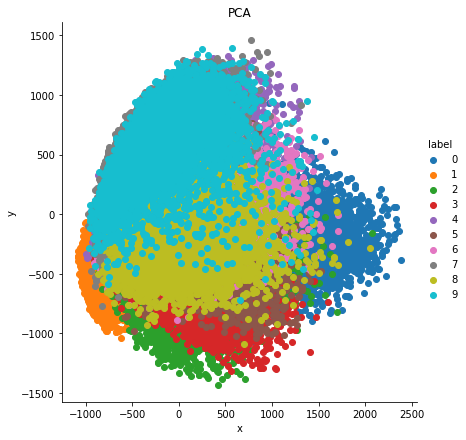

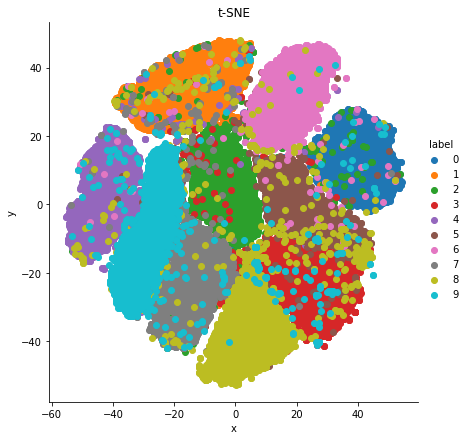

In [44]:
sns.FacetGrid(df, hue="label", height=6).map(plt.scatter, 'x', 'y').add_legend()
plt.title('PCA')
sns.FacetGrid(df2, hue="label", height=6).map(plt.scatter, 'x', 'y').add_legend()
plt.title('t-SNE')
plt.show()


Визуально t-sne поделил числа на кластеры лучше

Визуализируем t-sne еще прикольней, с картинками и интерактивным наведением на точки.

In [ ]:
first_test_image = np.array(mnist.test.images[0], dtype='float')
reshaped_image = first_image.reshape((28, 28))

In [86]:
df2['label_str'] = df2.label.astype(str)

In [1]:
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.transform import linear_cmap, factor_cmap
from bokeh.palettes import Spectral6

output_file("toolbar.html")
img_dict = {0: 'https://raw.githubusercontent.com/tphinkle/tphinkle.github.io/master/images/2017-8-15/mnist_0.png', 1: 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkVxsK-Bt4I2y18O4GpddEieR4Crj8dml9lg&usqp=CAU',
            2: 'https://www.researchgate.net/profile/Victor-Gallego/publication/340806666/figure/fig1/AS:882605511680001@1587440960762/An-original-MNIST-image-identified-as-2-A-perturbed-image-identified-as-7.ppm', 
            3: 'https://miro.medium.com/max/400/1*eMmTSDB6I11hxYqZfGDYsg.png', 
           4: 'https://forums.fast.ai/uploads/default/original/2X/4/4d5aaad749292d65343b4a642c01f4e0c9f0d15c.png',
            5: 'https://russianblogs.com/images/810/288a317fd39a8c535baef9c272c8e1ba.png', 
            6: 'https://www.saraai.com/images/blog/mnist1.png', 
            7: 'https://4.bp.blogspot.com/-9XZK9Dvd78E/V4i0e6UGoqI/AAAAAAAAE2E/-nxPCUIQ3wUGcIR-YOlSWTsC00UpfcDAACLcB/s1600/MNIST_image_7.png', 
           8: 'https://www.machinelearningmastery.ru/img/0-867671-824575.png',
            9: 'https://www.machinelearningmastery.ru/img/0-902844-758521.png', }

imgs = [img_dict[label] for label in df2.label ]


source = ColumnDataSource(data=dict(
    x=df2.x[:1000],
    y=df2.y[:1000],
    label_str=df2.label_str[:1000],
    imgs=imgs[:1000],
#     color=colors[:1000]
#     color = ['green','red', 'blue', 'orange', 'yellow', 'black', 'purple', 'cyan', 'pink', 'blue']
))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="200" alt="@imgs" width="200"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
    </div>
"""

p = figure(plot_width=800, plot_height=500, tooltips=TOOLTIPS, 
           title="t-sne MNIST")

# p.circle('x', 'y', size=20, source=source, fill_color=linear_cmap('y', "Viridis256", 0, 9))

pal =  ['green','red', 'blue', 'orange', 'yellow', 'black', 'purple', 'brown', 'pink', 'white']
p.circle('x', 'y', size=20, source=source, fill_color=factor_cmap('label_str', pal, sorted(df2.label_str.unique())), legend='label_str')

# factor_cmap('Competition', palette=['red', 'blue'], 
#                          factors=sorted(decathlon.Competition.unique()))

show(p)

NameError: name 'df2' is not defined

In [ ]:
from IPython.display import IFrame

IFrame(src='toolbar.html', width=800, height=600)